In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
pd.options.display.max_rows = 999

In [ ]:
def extractDMY(r):
    r['Day'] = r.fecha_publicacion.day
    r['Month'] = r.fecha_publicacion.month
    r['Year'] = r.fecha_publicacion.year
    return r

Words = ['analitica', 'inteligencia artificial', 'ciencia de datos', 'algoritmo', 'software', 'big data']
columna = 'descripcionhtml'
# columna = 'descripciontable'

def FindWordRatio(row):
    total_n_words = len(row[columna].split(' '))
    for w in Words:
        row['r_{}'.format(w)] = row[columna].count(w)/total_n_words
    return row

In [ ]:
info_df = pd.read_csv("result.csv")
info_df.fecha_publicacion = info_df.fecha_publicacion.str.extract(r'(\d{1,2}/\d{1,2}/\d{1,4})?')
info_df.fecha_publicacion = info_df.fecha_publicacion.apply(pd.to_datetime)
info_df.cuantia = info_df.cuantia.str.extract(r'([\d\W]*)')
info_df = info_df.apply(extractDMY,axis=1)
info_df.descripcionhtml = info_df.descripcionhtml.fillna('vacio', inplace=False)
Months = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Oct','Sep','Nov','Dec']
lambda_func = lambda r: '{}_{}'.format(r.Year, Months[r.Month-1])
info_df['Y_M'] = info_df.apply(lambda_func, axis=1)

In [ ]:
info_df = info_df.apply(FindWordRatio,axis=1)
info_df

,referencia,entidad_estatal,descripciontable,fase_actual,fecha_publicacion,fecha_presentacion_ofertas,cuantia,estado,descripcionhtml,titulo,Day,Month,Year,Y_M,r_analitica,r_inteligencia artificial,r_ciencia de datos,r_algoritmo,r_software,r_big data
0,0255-arc-cbn6-2021,armada nacional base naval no. 6 arc bogota,mantenimiento general cctv e implementacion de...,presentacion de oferta,2021-10-13,20/10/2021 2:00 PM (UTC -5 horas),38.205.525,Proceso adjudicado y celebrado,prestar servicios asociados a la gestion de la...,mantenimiento general cctv e implementacion d...,13,10,2021,2021_Sep,0.021277,0.021277,0.000000,0.000000,0.000000,0.021277
1,04-sc-drsu-0022-2022,instituto nacional de medicina legal y ciencia...,"adquisicion balanza analitica, termometro y te...",presentación de oferta,2022-05-05,10/05/2022 3:00 PM (UTC -5 horas),,Proceso en evaluación y observaciones,"adquisicion balanza analitica, termometro y te...","adquisicion balanza analitica, termometro y te...",5,5,2022,2022_May,0.052632,0.000000,0.000000,0.000000,0.000000,0.000000
2,125,universidad distrital francisco jose de caldas,asistencial laboratorio de informatica- inteli...,presentacion de oferta,2021-01-17,-,18.170.520,Publicado,vacio,asistencial laboratorio de informatica- inteli...,17,1,2021,2021_Jan,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,1730_2021,universidad distrital francisco jose de caldas,asistencial laboratorio de informatica- labora...,presentacion de oferta,2021-03-19,-,9.539.523,Publicado,generar insumos para la elaboracion de lineami...,asistencial laboratorio de informatica- labora...,19,3,2021,2021_Mar,0.000000,0.043478,0.000000,0.000000,0.000000,0.000000
4,22000605 h3 de 2022,unidad administrativa especial de aeronáutica ...,apoyar oficina de analitica analisis datos apl...,presentación de oferta,2022-01-23,-,59.800.000,Proceso adjudicado y celebrado,vacio,NaN,23,1,2022,2022_Jan,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,2271364,empresa colombiana de petroleos,programa de formación en ciencia de datos (pri...,presentación de oferta,2021-08-01,-,46.500.000,Publicado,vacio,NaN,1,8,2021,2021_Aug,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,2399210,empresa colombiana de petroleos,programa de formación en ciencia de datos (seg...,presentación de oferta,2021-08-06,-,167.400.000,Publicado,vacio,NaN,6,8,2021,2021_Aug,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7,2972-2022,universidad distrital francisco jose de caldas,"servicio para diseñar, diagramar e implementar...",presentación de oferta,2022-06-29,-,21.805.000,Publicado,vacio,NaN,29,6,2022,2022_Jun,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
8,3038252,empresa colombiana de petroleos,construccion e implementacion de una solucion ...,presentacion de oferta,2021-07-14,-,87.926.659,Publicado,sistema de ciberinteligencia basado en intelig...,construccion e implementacion de una solucion ...,14,7,2021,2021_Jul,0.000000,0.142857,0.000000,0.000000,0.000000,0.000000
9,3038980,empresa colombiana de petroleos,servicio técnico especializado para la generac...,presentación de oferta,2021-04-27,-,744.593.500,Publicado,vacio,NaN,27,4,2021,2021_Apr,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [ ]:
words_df = info_df.pivot_table(
               index= ['Y_M'], 
               values= ['r_{}'.format(w) for w in Words],
               aggfunc= np.mean)

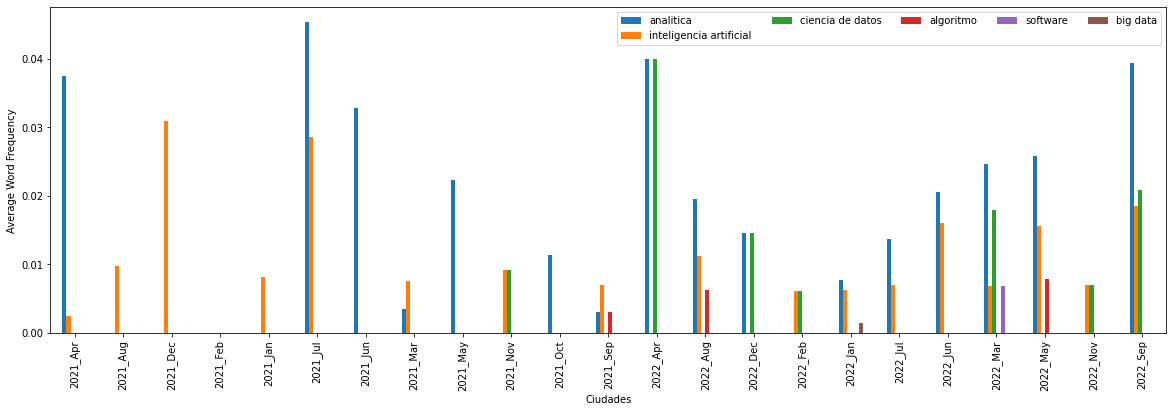

In [ ]:
column_order = words_df.sum().sort_values(ascending=False).index
words_df[column_order].plot.bar(figsize=(20,6))
plt.legend(Words,ncol=5)

plt.xlabel('Ciudades')
plt.ylabel('Average Word Frequency')
plt.show()

In [ ]:
entities_df = info_df.pivot_table(
    index=['entidad_estatal'],
    values= ['r_{}'.format(w) for w in Words],
    aggfunc= np.mean
)

# entities_df
columna = "r_analitica"
entities_df[entities_df["{}".format(columna)] > 0].nlargest(10, columna)

,r_algoritmo,r_analitica,r_big data,r_ciencia de datos,r_inteligencia artificial,r_software
entidad_estatal,,,,,,
corporacion para el desarrollo sostenible del uraba,0.0,0.071429,0.0,0.0,0.000000,0.071429
empresas publicas de armenia esp,0.0,0.071429,0.0,0.0,0.000000,0.000000
ministerio de salud y protección social,0.0,0.071429,0.0,0.0,0.000000,0.000000
fondo financiero distrital de salud..,0.0,0.065950,0.0,0.0,0.000000,0.000000
instituto nacional de medicina legal y ciencias forenses,0.0,0.052632,0.0,0.0,0.000000,0.000000
uniquindio,0.0,0.050000,0.0,0.0,0.000000,0.000000
fondo nacional del ahorro,0.0,0.043478,0.0,0.0,0.000000,0.043478
municipio de amaga - antioquia,0.0,0.043478,0.0,0.0,0.000000,0.000000
ese hospital departamental san rafael,0.0,0.041667,0.0,0.0,0.000000,0.000000
